In [ ]:
pip install colorama

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install researchpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from colorama import Fore, Back, Style
import plotly.graph_objects as go
import plotly.express as px
from scipy.stats import ttest_ind
import researchpy as rp
plt.style.use('fivethirtyeight')
import warnings



In [ ]:
df = pd.read_csv('Car_sales.csv')


In [ ]:
df.head()

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639


In [ ]:
df.isnull().sum()

Manufacturer            0
Model                   0
Sales_in_thousands      0
__year_resale_value    36
Vehicle_type            0
Price_in_thousands      2
Engine_size             1
Horsepower              1
Wheelbase               1
Width                   1
Length                  1
Curb_weight             2
Fuel_capacity           1
Fuel_efficiency         3
Latest_Launch           0
Power_perf_factor       2
dtype: int64

In [ ]:
df.shape

(157, 16)

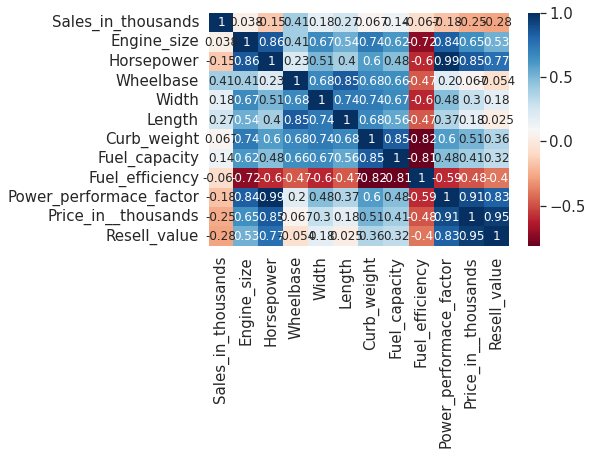

In [ ]:
# Finding correlation between features
sns.heatmap(df.corr(), annot=True, cmap="RdBu")
plt.show()

Observation:

From the heat map we observe that the resell value us strongly correlated to price , performance factor and horse power. 

In [ ]:
# imputing nan values 
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression

In [ ]:
imp=IterativeImputer(estimator=LinearRegression(),missing_values=np.nan)

In [ ]:
df1 = pd.DataFrame(df.iloc[:,[15,5,3]].values)

In [ ]:
df1=imp.fit_transform(df1)

In [ ]:
df2 = pd.DataFrame(df1)
df2.columns =['Power_performace_factor','Price_in__thousands', 'Resell_value']

In [ ]:
df = pd.concat([df,df2],axis =1)

In [ ]:
df.head()

,Manufacturer,Sales_in_thousands,Vehicle_type,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_performace_factor,Price_in__thousands,Resell_value
0,Acura,16.919,Passenger,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150,21.50,16.360
1,Acura,39.384,Passenger,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778,28.40,19.875
3,Acura,8.588,Passenger,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779,42.00,29.725
4,Audi,20.397,Passenger,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639,23.99,22.255
5,Audi,18.780,Passenger,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,8/9/2011,84.565105,33.95,23.555


In [ ]:
df.isnull().sum()

Manufacturer                0
Model                       0
Sales_in_thousands          0
__year_resale_value        36
Vehicle_type                0
Price_in_thousands          2
Engine_size                 1
Horsepower                  1
Wheelbase                   1
Width                       1
Length                      1
Curb_weight                 2
Fuel_capacity               1
Fuel_efficiency             3
Latest_Launch               0
Power_perf_factor           2
Power_performace_factor     0
Price_in__thousands         0
Resell_value                0
dtype: int64

In [ ]:
df = df.dropna()


In [ ]:
df.drop(columns=['Model','__year_resale_value','Power_perf_factor','Price_in_thousands'],inplace=True)

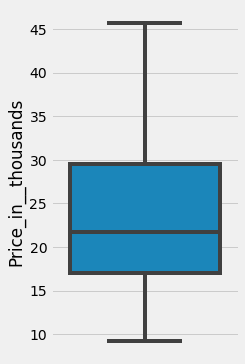

In [ ]:
# plotting boxplot for price
plt.figure(figsize=(3,6))
sns.boxplot(y='Price_in__thousands', data=df,showfliers=False);

Observation:

From the boxplot we observe that the price of cars moslty lies between 16k to 30k

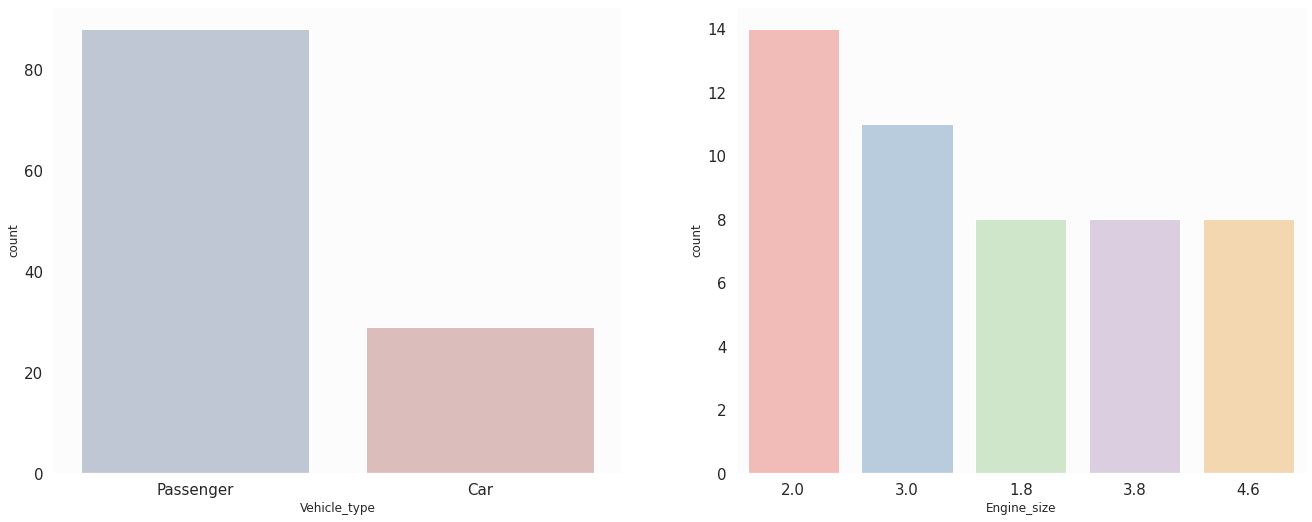

In [ ]:
# plotting countplot for car type and engine sizes
fig, ax =plt.subplots(1,2,figsize=(20, 8))
sns.set(rc={"axes.facecolor":"#fcfcfc", "axes.grid":False,'xtick.labelsize':15,'ytick.labelsize':15})
sns.countplot(x ='Vehicle_type',data = df,order=df.Vehicle_type.value_counts().iloc[:5].index, ax = ax[0],palette="vlag")
sns.countplot(x ='Engine_size',data = df,order=df.Engine_size.value_counts().iloc[:5].index, ax = ax[1],palette="Pastel1")
fig.show()

Observation:



*   Majority of vehicle are passenger type
*   Majority size of engine are 2.0L and 3.0L



Text(0.5, 1.0, 'Manufacturers vs no. of listings')

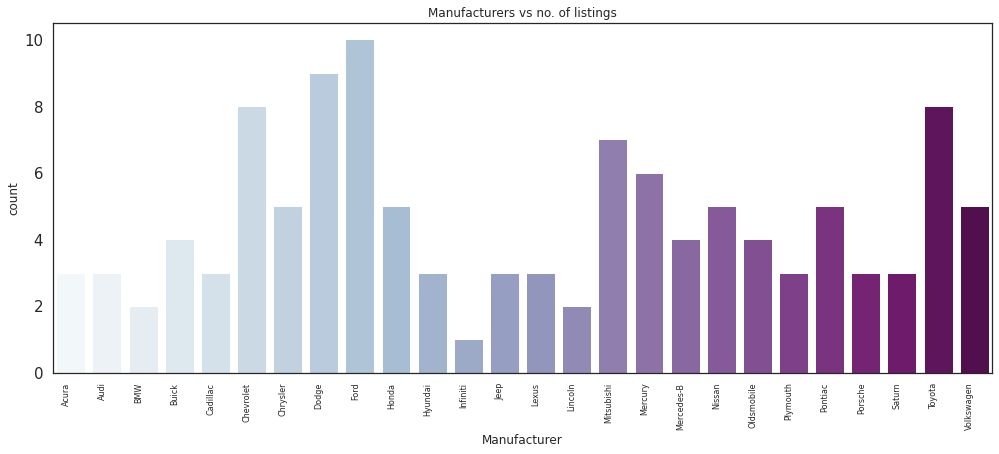

In [ ]:
# plotting countplot for different manufactures
plt.figure(figsize=(15,6))
ax = sns.countplot(x='Manufacturer',data=df,palette="BuPu");
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right",fontsize=8);
plt.title("Manufacturers vs no. of listings")

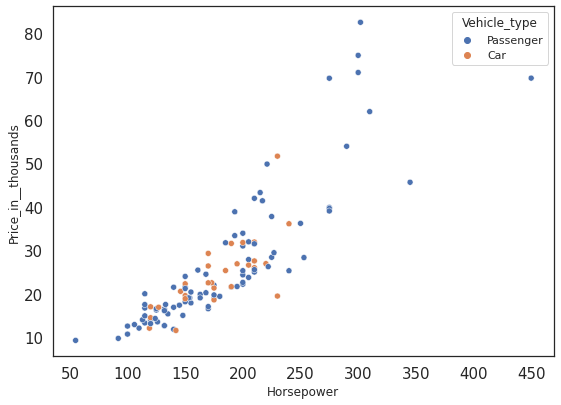

In [ ]:
# plotting scatter plot between price and horsepower
plt.figure(figsize=(8,6))
sns.scatterplot(x="Horsepower",y="Price_in__thousands",data=df,hue='Vehicle_type')

Observation:

WE can observe that with increase in horsepower there is a significant increase in prices of the car

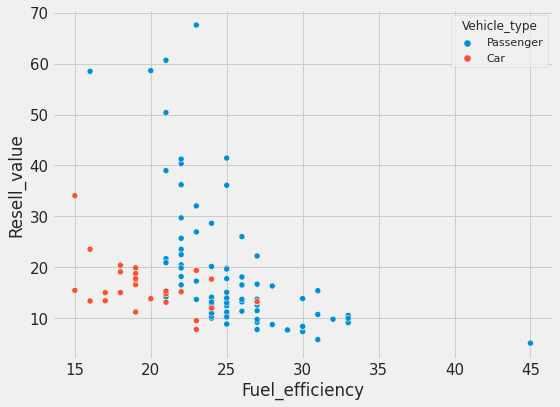

In [ ]:
# plotting scatter plot between Fuel Efficiency and Resell value
plt.figure(figsize=(8,6))
sns.scatterplot(x="Fuel_efficiency",y="Resell_value",data=df,hue='Vehicle_type')

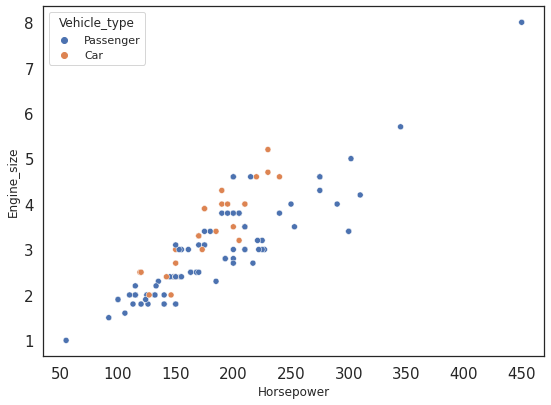

In [ ]:
# plotting scatter plot between Engine Size and horsepower
plt.figure(figsize=(8,6))
sns.scatterplot(x="Horsepower",y="Engine_size",data=df,hue='Vehicle_type')

Observation:

From the graph we can see there is a positive linear relationship between horsepower and engine size of a vehicle.

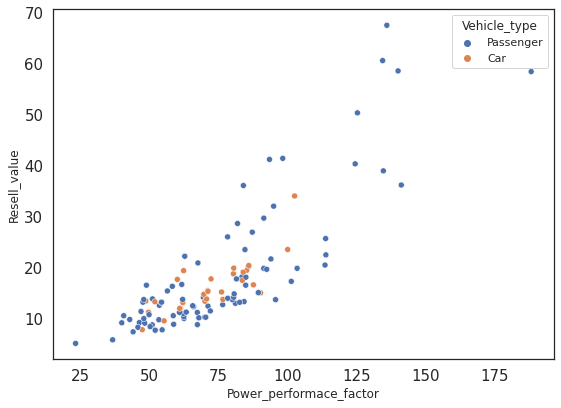

In [ ]:
# plotting scatter plot between price and horsepower
plt.figure(figsize=(8,6))
sns.scatterplot(x="Power_performace_factor",y="Resell_value",data=df,hue='Vehicle_type')

Observation:

From the graph we can see there is a positive linear relationship between power performance factor and resell value of a vehicle.

In [ ]:
# performing statistical tests
my_rho = np.corrcoef(df['Power_performace_factor'], df['Resell_value'])

print(my_rho)

[[1.         0.82951124]
 [0.82951124 1.        ]]


In [ ]:
my_rho = np.corrcoef(df['Horsepower'], df['Resell_value'])
print(my_rho)

[[1.         0.77311034]
 [0.77311034 1.        ]]


In [ ]:
my_rho = np.corrcoef(df['Fuel_efficiency'], df['Resell_value'])
print(my_rho)

[[ 1.         -0.39845921]
 [-0.39845921  1.        ]]


Observation:

Using pearson correlation coefficient we can observe that power performance factor and horsepower have a stong positive correlation with resell value but fuel efficiency has a negative weak correlation.

In [ ]:
# performing t-test
rp.ttest(group1= df['Resell_value'][df['Vehicle_type'] == 'Passenger'], group1_name= 'Passenger',
         group2= df['Resell_value'][df['Vehicle_type'] == 'Car'], group2_name= 'Car')

(    Variable      N       Mean         SD        SE  95% Conf.   Interval
 0  Passenger   88.0  18.639716  13.051730  1.391319  15.874319  21.405113
 1        Car   29.0  16.186034   4.901001  0.910093  14.321794  18.050275
 2   combined  117.0  18.031538  11.605632  1.072941  15.906443  20.156633,
                 Independent t-test   results
 0  Difference (Passenger - Car) =     2.4537
 1            Degrees of freedom =   115.0000
 2                             t =     0.9873
 3         Two side test p value =     0.3256
 4        Difference < 0 p value =     0.8372
 5        Difference > 0 p value =     0.1628
 6                     Cohen's d =     0.2114
 7                     Hedge's g =     0.2100
 8                 Glass's delta =     0.1880
 9                   Pearson's r =     0.0917)

Observation:

From the T test we can see that p value comes out to be 0.32, so we can say that vehicle type has no significant effect on the resell value of the vehicle.